{'m00': 8994.0, 'm10': 6167815.833333333, 'm01': 6352063.166666666, 'm20': 4283789716.833333, 'm11': 4355719807.916666, 'm02': 4488251345.5, 'm30': 3012112341719.85, 'm21': 3024362400945.8335, 'm12': 3077439069777.3667, 'm03': 3172773320649.25, 'mu20': 54086341.92591095, 'mu11': -334870.0575532913, 'mu02': 2070950.4229097366, 'mu30': 236064829.63720703, 'mu21': -628931092.8884506, 'mu12': 3726077.330459118, 'mu03': -4716964.199707031, 'nu20': 0.6686238176266319, 'nu11': -0.004139716022888721, 'nu02': 0.025601413010666915, 'nu30': 0.030771529259010624, 'nu21': -0.08198244336719342, 'nu12': 0.00048570173613650164, 'nu03': -0.0006148658489621667}


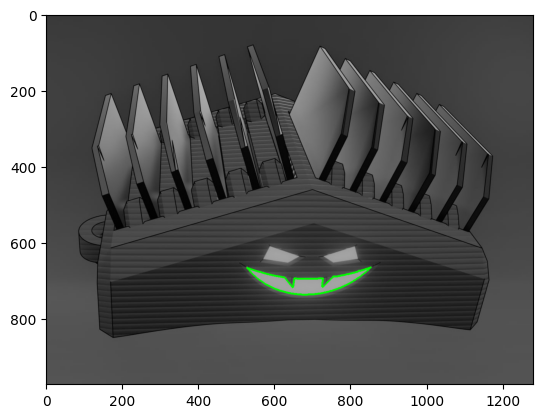

In [16]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img_gray = cv.imread('../lab1/test.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "Файл не найден"

img_color = cv.cvtColor(img_gray, cv.COLOR_GRAY2BGR)

ret, thresh = cv.threshold(img_gray, 127, 255, 0)

# Поиск контуров (OpenCV 4.x возвращает 2 значения)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
assert len(contours) > 0, "no contours found"
cnt = contours[0]

M = cv.moments(cnt)
print(M)
cx = int(M['m10'] / M['m00']) if M['m00'] != 0 else 0
cy = int(M['m01'] / M['m00']) if M['m00'] != 0 else 0

# Площадь и периметр
area = cv.contourArea(cnt)
perimeter = cv.arcLength(cnt, True)

# Аппроксимация контура (алгоритм Дуглас–Пьюкер)
epsilon = 0.1 * cv.arcLength(cnt, True)
approx = cv.approxPolyDP(cnt, epsilon, True)

img_approx = img_color.copy()
cv.drawContours(img_approx, [cnt], -1, (0, 255, 0), 3) 

plt.imshow(img_approx)

C:\Users\mrl1c\AppData\Local\Temp\ipykernel_57824\3335536940.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lefty = int((-x0 * vy / vx) + y0)
C:\Users\mrl1c\AppData\Local\Temp\ipykernel_57824\3335536940.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  righty = int(((cols - x0) * vy / vx) + y0)


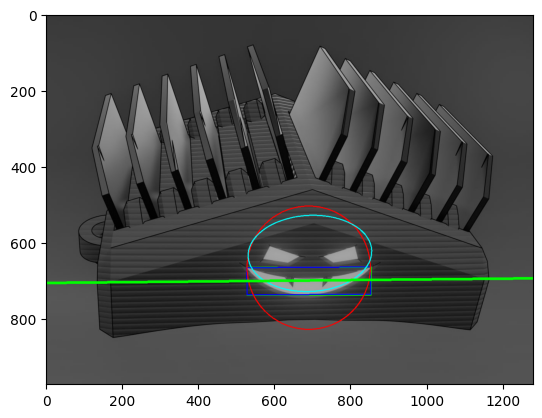

In [17]:
# Выпуклая оболочка и проверка выпуклости 
hull = cv.convexHull(cnt)
is_convex = cv.isContourConvex(cnt)

# ==== 7a) Ось-ориентированный прямоугольник
x, y, w, h = cv.boundingRect(cnt)
cv.rectangle(img_color, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Вращаемый прямоугольник минимальной площади 
rect = cv.minAreaRect(cnt)              # (center, (w,h), angle)
box = cv.boxPoints(rect)                # 4 угла
box = box.astype(int)
cv.drawContours(img_color, [box], 0, (0, 0, 255), 2)

# Минимальная описанная окружность
(xc, yc), radius = cv.minEnclosingCircle(cnt)
center = (int(xc), int(yc))
radius = int(radius)
cv.circle(img_color, center, radius, (255, 0, 0), 2)

# Аппроксимация эллипсом
if len(cnt) >= 5:                       # fitEllipse требует >= 5 точек
    ellipse = cv.fitEllipse(cnt)
    cv.ellipse(img_color, ellipse, (0, 255, 255), 2)

# Подбор линии 
rows, cols = img_gray.shape[:2]
[vx, vy, x0, y0] = cv.fitLine(cnt, cv.DIST_L2, 0, 0.01, 0.01)
lefty = int((-x0 * vy / vx) + y0)
righty = int(((cols - x0) * vy / vx) + y0)
cv.line(img_color, (cols - 1, righty), (0, lefty), (0, 255, 0), 5)


plt.imshow(img_color)